In [ ]:
import pandas as pd

data = pd.read_csv('data.csv')

In [23]:
import yfinance as yf
btc_stock=yf.Ticker("BTC-USD")

In [24]:
from datetime import datetime
import pandas_datareader.data as web

start = "2017-12-03 10:04:50"
end = "2021-03-31 00:00:00"

start_dt = datetime.strptime(start, "%Y-%m-%d %H:%M:%S")
end_dt = datetime.strptime(end, "%Y-%m-%d %H:%M:%S")

btc_stock = btc_stock.history(start=start_dt, end=end_dt)
print(btc_stock)


                                   Open          High           Low  \
Date                                                                  
2017-12-03 00:00:00+00:00  11082.700195  11858.700195  10862.000000   
2017-12-04 00:00:00+00:00  11315.400391  11657.200195  11081.799805   
2017-12-05 00:00:00+00:00  11685.700195  12032.000000  11604.599609   
2017-12-06 00:00:00+00:00  11923.400391  14369.099609  11923.400391   
2017-12-07 00:00:00+00:00  14266.099609  17899.699219  14057.299805   
...                                 ...           ...           ...   
2021-03-26 00:00:00+00:00  51683.011719  55137.312500  51579.855469   
2021-03-27 00:00:00+00:00  55137.566406  56568.214844  54242.910156   
2021-03-28 00:00:00+00:00  55974.941406  56610.312500  55071.113281   
2021-03-29 00:00:00+00:00  55947.898438  58342.097656  55139.339844   
2021-03-30 00:00:00+00:00  57750.132812  59447.222656  57251.550781   

                                  Close       Volume  Dividends  Stock Split

In [25]:
btc_data=btc_stock

In [26]:
data=btc_data

In [27]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-03 00:00:00+00:00,11082.700195,11858.700195,10862.000000,11323.200195,6608309760,0.0,0.0
2017-12-04 00:00:00+00:00,11315.400391,11657.200195,11081.799805,11657.200195,6132409856,0.0,0.0
2017-12-05 00:00:00+00:00,11685.700195,12032.000000,11604.599609,11916.700195,6895260160,0.0,0.0
2017-12-06 00:00:00+00:00,11923.400391,14369.099609,11923.400391,14291.500000,12656300032,0.0,0.0
2017-12-07 00:00:00+00:00,14266.099609,17899.699219,14057.299805,17899.699219,17950699520,0.0,0.0
...,...,...,...,...,...,...,...
2021-03-26 00:00:00+00:00,51683.011719,55137.312500,51579.855469,55137.312500,56652197978,0.0,0.0
2021-03-27 00:00:00+00:00,55137.566406,56568.214844,54242.910156,55973.511719,47266542233,0.0,0.0
2021-03-28 00:00:00+00:00,55974.941406,56610.312500,55071.113281,55950.746094,47686580918,0.0,0.0


In [30]:
data["Timestamp"]=data.index

In [31]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,timestamp,Timestamp
Date,,,,,,,,,
2017-12-03 00:00:00+00:00,11082.700195,11858.700195,10862.000000,11323.200195,6608309760,0.0,0.0,2017-12-03 00:00:00+00:00,2017-12-03 00:00:00+00:00
2017-12-04 00:00:00+00:00,11315.400391,11657.200195,11081.799805,11657.200195,6132409856,0.0,0.0,2017-12-04 00:00:00+00:00,2017-12-04 00:00:00+00:00
2017-12-05 00:00:00+00:00,11685.700195,12032.000000,11604.599609,11916.700195,6895260160,0.0,0.0,2017-12-05 00:00:00+00:00,2017-12-05 00:00:00+00:00
2017-12-06 00:00:00+00:00,11923.400391,14369.099609,11923.400391,14291.500000,12656300032,0.0,0.0,2017-12-06 00:00:00+00:00,2017-12-06 00:00:00+00:00
2017-12-07 00:00:00+00:00,14266.099609,17899.699219,14057.299805,17899.699219,17950699520,0.0,0.0,2017-12-07 00:00:00+00:00,2017-12-07 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...
2021-03-26 00:00:00+00:00,51683.011719,55137.312500,51579.855469,55137.312500,56652197978,0.0,0.0,2021-03-26 00:00:00+00:00,2021-03-26 00:00:00+00:00
2021-03-27 00:00:00+00:00,55137.566406,56568.214844,54242.910156,55973.511719,47266542233,0.0,0.0,2021-03-27 00:00:00+00:00,2021-03-27 00:00:00+00:00
2021-03-28 00:00:00+00:00,55974.941406,56610.312500,55071.113281,55950.746094,47686580918,0.0,0.0,2021-03-28 00:00:00+00:00,2021-03-28 00:00:00+00:00


In [14]:
print('Dataset Shape:', data.shape)
print('Data Types:', data.dtypes)
print('Summary Statistics:')
print(data.describe())

Dataset Shape: (1214, 7)
Data Types: Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object
Summary Statistics:
               Open          High           Low         Close        Volume  \
count   1214.000000   1214.000000   1214.000000   1214.000000  1.214000e+03   
mean   11496.467232  11822.984216  11156.031329  11535.454323  2.210959e+10   
std    10375.355658  10775.592628   9968.341336  10464.191055  2.058469e+10   
min     3236.274658   3275.377930   3191.303467   3236.761719  2.923670e+09   
25%     6649.043701   6782.112549   6543.222534   6646.154907  6.632222e+09   
50%     8791.559082   8958.295898   8587.253906   8795.703125  1.712061e+10   
75%    10942.106445  11236.218262  10634.108398  10943.007324  3.082593e+10   
max    61221.132812  61683.863281  59302.316406  61243.085938  3.509679e+11   

       Dividends  Stock Splits  
count     1214.0

## Data Preprocessing

In [ ]:
df=data.copy()

In [32]:

data_daily = data.resample('D', on='Timestamp').mean()

data_monthly = data.resample('M', on='Timestamp').mean()

data_annual = data.resample('A-DEC', on='Timestamp').mean()

data_quarterly = data.resample('Q-DEC', on='Timestamp').mean()

In [33]:
data_daily = data_daily.fillna(data_daily.mean())
data_monthly = data_monthly.fillna(data_monthly.mean())
data_annual = data_annual.fillna(data_annual.mean())
data_quarterly = data_quarterly.fillna(data_quarterly.mean())


## Feature Engineering

In [34]:
data_daily['Price_Pct_Change'] = data_daily['Close'].pct_change()
data_monthly['Moving_Adatarage_3M'] = data_monthly['Close'].rolling(window=3).mean()
data_monthly['Moving_Average_6M'] = data_monthly['Close'].rolling(window=6).mean()
data_annual['Moving_Average_12M'] = data_annual['Close'].rolling(window=12).mean()
data_quarterly['Rolling_Std_3M'] = data_quarterly['Close'].rolling(window=3).std()
data_quarterly['Rolling_Std_6M'] = data_quarterly['Close'].rolling(window=6).std()


## Exploratory Data Analysis

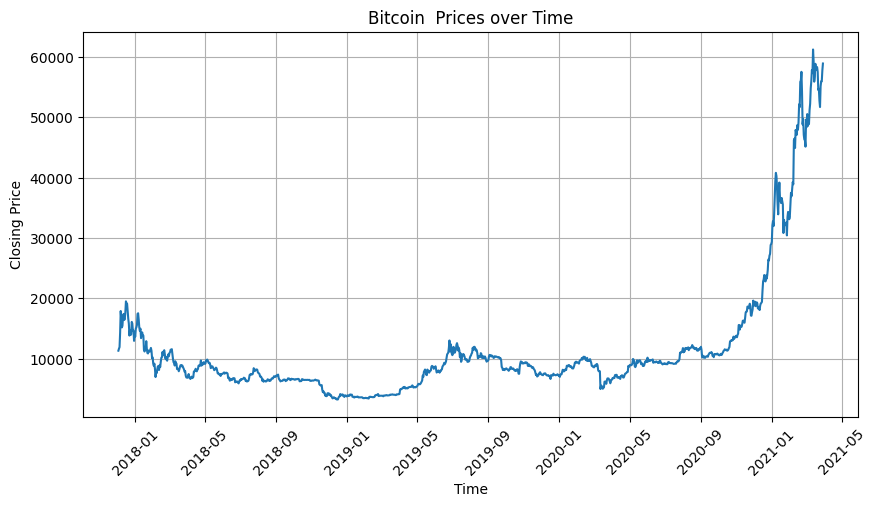

In [38]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 5))
plt.plot(data.index.to_numpy(), data['Close'].to_numpy())
plt.title('Bitcoin  Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

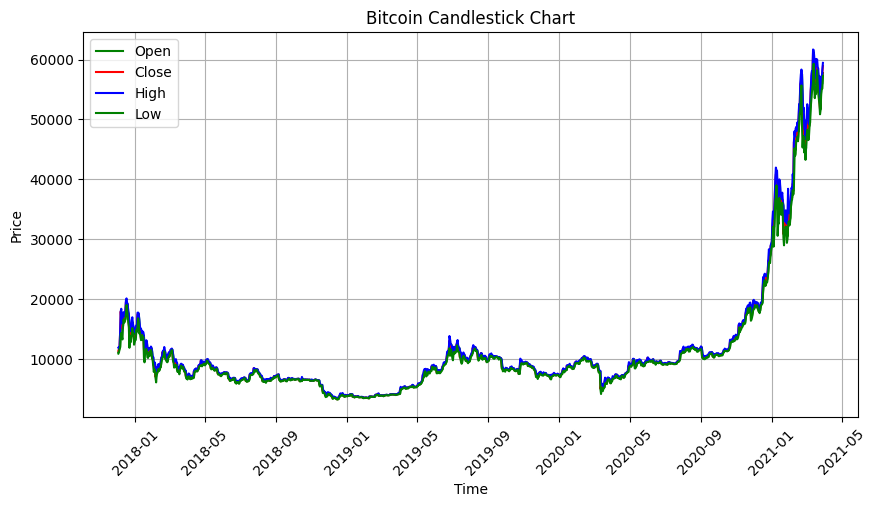

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(data.index.to_numpy(), data['Open'].to_numpy(), color='green', label='Open')
plt.plot(data.index.to_numpy(), data['Close'].to_numpy(), color='red', label='Close')
plt.plot(data.index.to_numpy(), data['High'].to_numpy(), color='blue', label='High')
plt.plot(data.index.to_numpy(), data['Low'].to_numpy(), color='green', label='Low')
plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

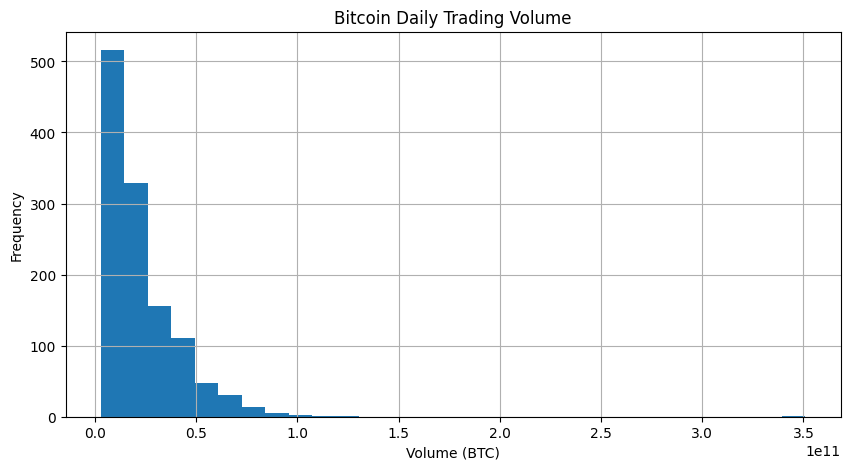

In [43]:
plt.figure(figsize=(10, 5))
plt.hist(data['Volume'], bins=30)
plt.title('Bitcoin Daily Trading Volume')
plt.xlabel('Volume (BTC)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [42]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,timestamp,Timestamp
Date,,,,,,,,,
2017-12-03 00:00:00+00:00,11082.700195,11858.700195,10862.000000,11323.200195,6608309760,0.0,0.0,2017-12-03 00:00:00+00:00,2017-12-03 00:00:00+00:00
2017-12-04 00:00:00+00:00,11315.400391,11657.200195,11081.799805,11657.200195,6132409856,0.0,0.0,2017-12-04 00:00:00+00:00,2017-12-04 00:00:00+00:00
2017-12-05 00:00:00+00:00,11685.700195,12032.000000,11604.599609,11916.700195,6895260160,0.0,0.0,2017-12-05 00:00:00+00:00,2017-12-05 00:00:00+00:00
2017-12-06 00:00:00+00:00,11923.400391,14369.099609,11923.400391,14291.500000,12656300032,0.0,0.0,2017-12-06 00:00:00+00:00,2017-12-06 00:00:00+00:00
2017-12-07 00:00:00+00:00,14266.099609,17899.699219,14057.299805,17899.699219,17950699520,0.0,0.0,2017-12-07 00:00:00+00:00,2017-12-07 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...
2021-03-26 00:00:00+00:00,51683.011719,55137.312500,51579.855469,55137.312500,56652197978,0.0,0.0,2021-03-26 00:00:00+00:00,2021-03-26 00:00:00+00:00
2021-03-27 00:00:00+00:00,55137.566406,56568.214844,54242.910156,55973.511719,47266542233,0.0,0.0,2021-03-27 00:00:00+00:00,2021-03-27 00:00:00+00:00
2021-03-28 00:00:00+00:00,55974.941406,56610.312500,55071.113281,55950.746094,47686580918,0.0,0.0,2021-03-28 00:00:00+00:00,2021-03-28 00:00:00+00:00


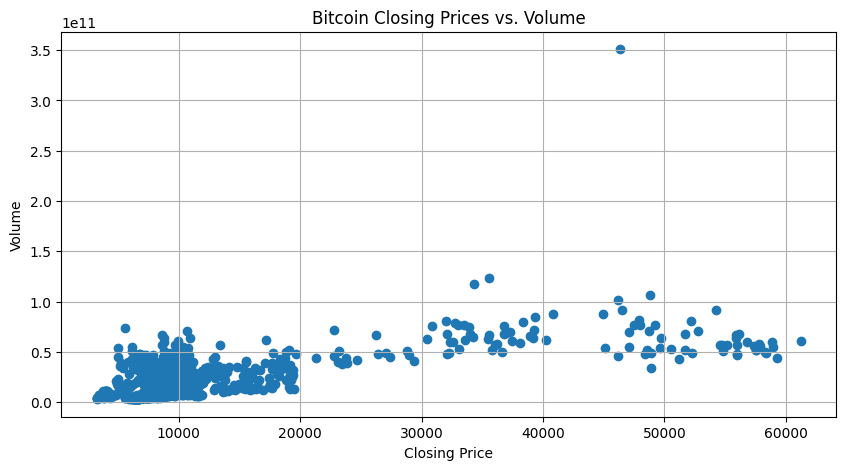

In [45]:
# Plot 4: Scatter plot of Bitcoin closing prices and volume
plt.figure(figsize=(10, 5))
plt.scatter(data['Close'], data['Volume'])
plt.title('Bitcoin Closing Prices vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

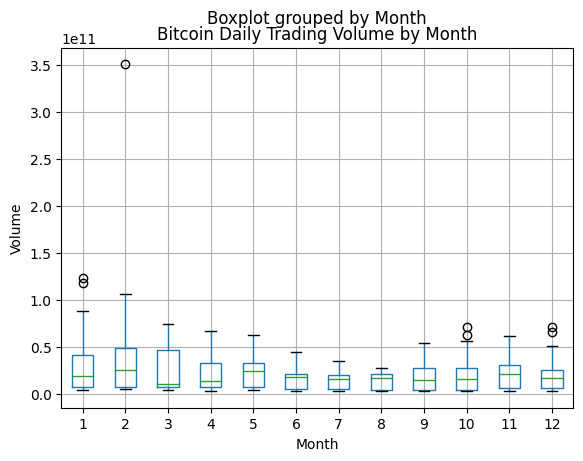

In [48]:
# Plot 5: Box plot of Bitcoin daily trading volume by month
data['Month'] = data.index.month
plt.figure(figsize=(10, 5))
data.boxplot(column='Volume', by='Month')
plt.title('Bitcoin Daily Trading Volume by Month')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

## Model Selection

In [49]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [50]:
train_size = int(len(data_daily) * 0.8)
train_data, test_data = data_daily[:train_size], data_daily[train_size:]

In [51]:
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data[['Close']])
scaled_test_data = scaler.transform(test_data[['Close']])

In [ ]:
scaled_train_data

array([[7.86163155e-06],
       [2.47576242e-05],
       [3.48344116e-05],
       ...,
       [4.01290226e-01],
       [4.15901595e-01],
       [4.19103600e-01]])

### Arima Model

In [191]:
# ARIMA model
arima_model = ARIMA(train_data['Close'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

### SARIMA model


In [53]:
sarima_model = SARIMAX(train_data['Close'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

### LSTM

In [171]:
# LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(np.expand_dims(scaled_train_data, axis=-1),
                              np.expand_dims(scaled_train_data, axis=-1),
                              epochs=10, batch_size=1, verbose=0)
lstm_predictions = lstm_model.predict(np.expand_dims(scaled_test_data, axis=-1))

8/8 [==============================] - 0s 2ms/step


In [ ]:
lstm_predictions

array([[0.40354314],
       [0.43601358],
       [0.43321922],
       [0.42928177],
       [0.4285491 ],
       [0.41462186],
       [0.42411298],
       [0.43034914],
       [0.4235648 ],
       [0.38985822],
       [0.3859911 ],
       [0.38496295],
       [0.39426094],
       [0.3943694 ],
       [0.38733196],
       [0.38838074],
       [0.39218923],
       [0.39910567],
       [0.40569875],
       [0.41479805],
       [0.43331632],
       [0.45152506],
       [0.45848137],
       [0.45435733],
       [0.4541083 ],
       [0.46426156],
       [0.48646146],
       [0.5320749 ],
       [0.533143  ],
       [0.53796375],
       [0.56113636],
       [0.6266314 ],
       [0.5852792 ],
       [0.57908034],
       [0.58758974],
       [0.5722654 ],
       [0.5302091 ],
       [0.511304  ],
       [0.5626906 ],
       [0.5831136 ],
       [0.55258226],
       [0.5661471 ],
       [0.5610217 ],
       [0.5848005 ],
       [0.62026334],
       [0.6269442 ],
       [0.5744614 ],
       [0.574

### Gradient Boosting Rregressor

In [161]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
gbr_model = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(gbr_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(np.arange(len(train_data)).reshape(-1, 1), train_data['Close'])

best_gbr_model = grid_search.best_estimator_

best_gbr_model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data['Close'])

gbr_predictions = best_gbr_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))



### Delta Rule LSTM

In [ ]:
# import numpy as np
# from keras.models import Sequential
# from keras.layers import LSTM, Dense

# def create_lstm_model():
#     model = Sequential()
#     model.add(LSTM(128, input_shape=(1, 1)))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     return model


# def predict_lstm_model(model, test_data):
#     predictions = model.predict(np.expand_dims(test_data, axis=-1))
#     return predictions

# def delta_rule(target, predicted, learning_rate=0.01):
#     error = target - predicted
#     delta = learning_rate * error * predicted
#     return delta

# def train_lstm_with_delta_rule(model, train_data, epochs=10, learning_rate=0.01):
#     for epoch in range(epochs):
#         for i in range(len(train_data) - 1):
#             X = np.array(train_data[i]).reshape(1, 1, 1)
#             y_true = np.array(train_data[i + 1]).reshape(1, 1, 1)
#             y_pred = model.predict(X)
#             delta = delta_rule(y_true, y_pred, learning_rate)
#             model.train_on_batch(X, y_true - delta)



# lstm_predictions = predict_lstm_model(lstm_model, scaled_test_data)

# # Train LSTM model using Delta Rule
# train_lstm_with_delta_rule(lstm_model, scaled_train_data)

# # Make predictions using LSTM model trained with Delta Rule
# delta_rule_predictions = predict_lstm_model(lstm_model, scaled_test_data)


### Evaluation

In [56]:
# Calculate RMSE for each model
arima_rmse = np.sqrt(mean_squared_error(test_data['Close'], arima_predictions))
sarima_rmse = np.sqrt(mean_squared_error(test_data['Close'], sarima_predictions))
lstm_rmse = np.sqrt(mean_squared_error(test_data['Close'], lstm_predictions))
gbr_rmse = np.sqrt(mean_squared_error(test_data['Close'], gbr_predictions))

# Print the RMSE values
print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"LSTM RMSE: {lstm_rmse}")
print(f"Gradient Boosting Regressor RMSE: {gbr_rmse}")

ARIMA RMSE: 21883.58853364849
SARIMA RMSE: 21690.311306621436
LSTM RMSE: 30459.54711154693
Gradient Boosting Regressor RMSE: 22005.201670218976


### RMSE Comparison

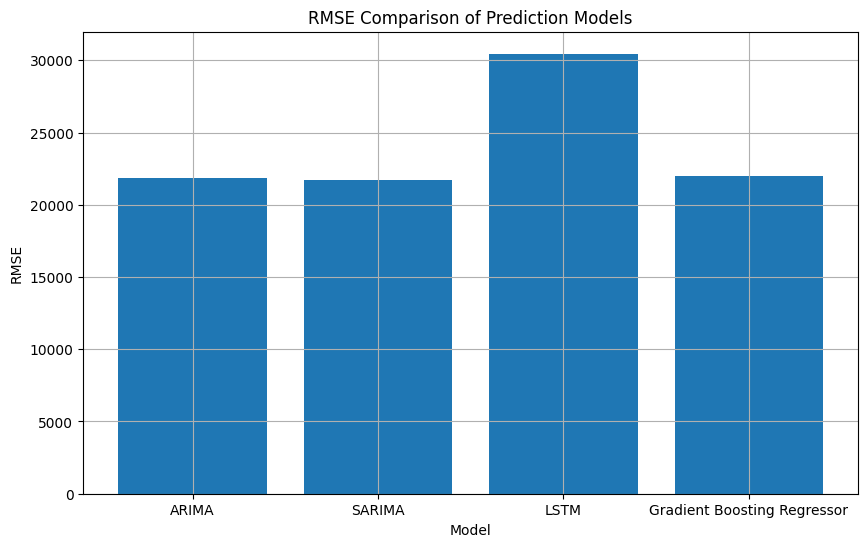

In [57]:
# Define the models and RMSE values
models = ['ARIMA', 'SARIMA', 'LSTM', 'Gradient Boosting Regressor']
rmse_values = [arima_rmse, sarima_rmse, lstm_rmse, gbr_rmse]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values)
plt.title('RMSE Comparison of Prediction Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


In [58]:
test_data["Close"]

Timestamp
2020-07-31 00:00:00+00:00    11323.466797
2020-08-01 00:00:00+00:00    11759.592773
2020-08-02 00:00:00+00:00    11053.614258
2020-08-03 00:00:00+00:00    11246.348633
2020-08-04 00:00:00+00:00    11205.892578
                                 ...     
2021-03-26 00:00:00+00:00    55137.312500
2021-03-27 00:00:00+00:00    55973.511719
2021-03-28 00:00:00+00:00    55950.746094
2021-03-29 00:00:00+00:00    57750.199219
2021-03-30 00:00:00+00:00    58917.691406
Freq: D, Name: Close, Length: 243, dtype: float64

In [77]:
sarima_predictions

2020-07-31 00:00:00+00:00    11099.314946
2020-08-01 00:00:00+00:00    11107.804484
2020-08-02 00:00:00+00:00    11101.747443
2020-08-03 00:00:00+00:00    11106.068967
2020-08-04 00:00:00+00:00    11102.985684
                                 ...     
2021-03-26 00:00:00+00:00    11104.269530
2021-03-27 00:00:00+00:00    11104.269530
2021-03-28 00:00:00+00:00    11104.269530
2021-03-29 00:00:00+00:00    11104.269530
2021-03-30 00:00:00+00:00    11104.269530
Freq: D, Name: predicted_mean, Length: 243, dtype: float64

In [ ]:
scaled_train_data

# **Twitter Data And Sentiment Evaluation**  


import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats as stat

In [61]:
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats as stat

In [101]:
import pandas as pd

df = pd.read_csv("Text.csv")

In [63]:
df

,date,text,sen
0,2017-12-03 10:04:50,guy thinkhas bitcoin recovered dip solidifying...,-1.0
1,2017-12-03 10:07:11,another dip come imho,-1.0
2,2017-12-03 10:08:57,suggested topic screenshots wallet balance ear...,0.0
3,2017-12-03 10:11:38,really scientific look chart analysis say see ...,0.0
4,2017-12-03 10:24:42,tongue cheek lot people feel compelled make ne...,0.0
...,...,...,...
1196199,2021-08-09 13:00:57,nexons bitcoin treasure worth usd usd bitcoin,0.0
1196200,2021-08-09 13:00:58,part btcmarkets btc bch eth ltc xrp coinspot b...,0.0
1196201,2021-08-09 13:00:58,evanprim psychedelicbart woke time bitcoin sta...,1.0
1196202,2021-08-09 13:00:59,ethereum could flip bitcoin major upgrade cryp...,1.0


In [121]:
df["impact_score"]=df["sen"]

In [ ]:
btc_data = pd.read_csv("data.csv")
btc_data.head()

In [98]:
df_2021 = data[data['Timestamp'].dt.year >= 2018]
df_2021 = df_2021[df_2021['Timestamp'].dt.year == 2020]  


In [102]:

df['date'] = pd.to_datetime(df['date'])
df = df[df['date'].dt.year == 2020]

In [103]:
df.set_index('date', inplace=True)

In [130]:
df = df.drop(df.index[::2])
df = df.drop(df.index[::2])
df = df.drop(df.index[::2])
df = df.drop(df.index[::2])
df = df.drop(df.index[::2])



In [131]:
len(df)

388

In [115]:
predictions=sarima_predictions

In [117]:
predictions=pd.DataFrame(predictions)
predictions["date"]=predictions.index
predictions = predictions[predictions['date'].dt.year == 2020]


# BTC with Sentiment

In [124]:
btc_stock=df_2021

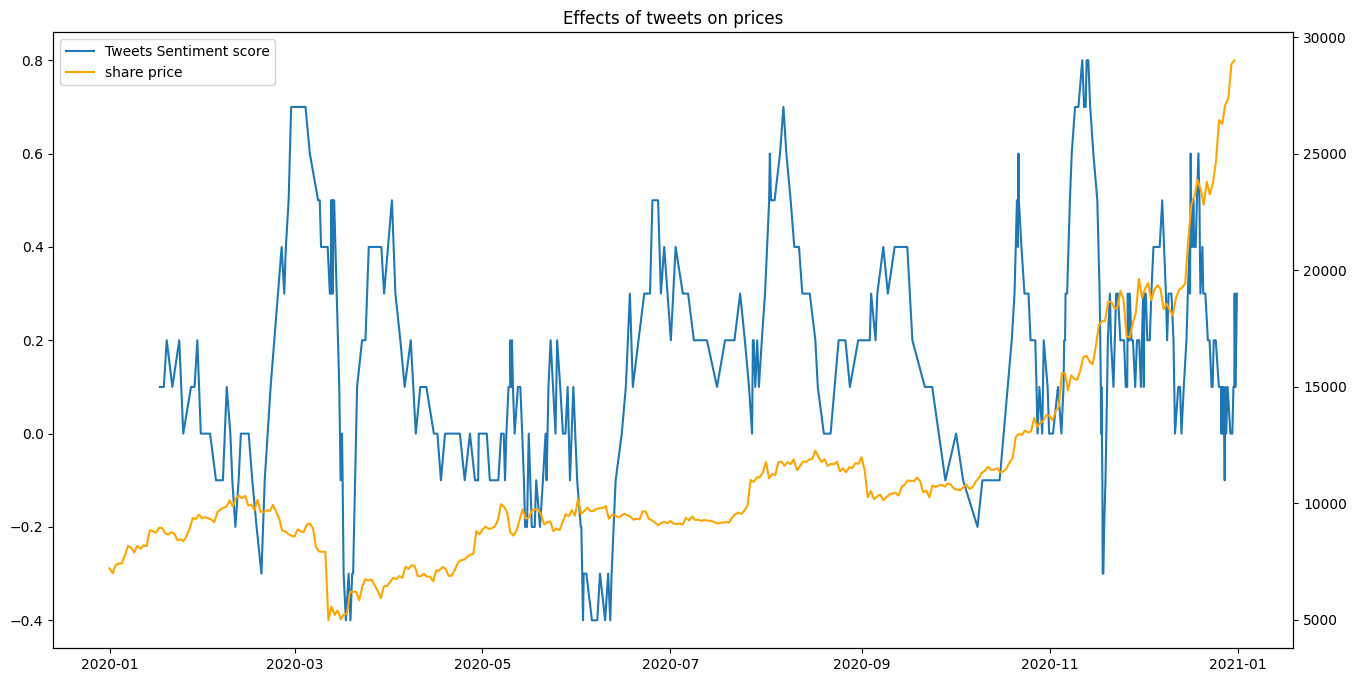

Spearman correlation: corr=nan pval=nan


In [132]:
sentiment= df.groupby('date')['impact_score'].mean().shift(-1).rolling(10).mean()
corr_test = df.groupby('date')['impact_score'].mean().shift(-1)
corr, pval = stat.spearmanr(corr_test.reindex(btc_stock.index.to_numpy()), btc_stock['Open'],nan_policy='omit')

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(sentiment.index.to_numpy(),sentiment.to_numpy(),label='Tweets Sentiment score')
ax2 = ax.twinx()
ax2.plot(btc_stock.index.to_numpy(),btc_stock['Close'].to_numpy(),color='orange',label='share price')
ax2.set_title("Effects of tweets on prices")

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.show()

print("Spearman correlation: corr={} pval={}".format(corr,pval))

In [127]:
df

,text,sen,impact_score
date,,,
2020-01-01 18:00:10,great news transaction matter chain public ana...,1.0,1.0
2020-01-02 02:45:39,listened people list potential benefit conside...,-1.0,-1.0
2020-01-02 15:00:37,dare save money thats hurting economy n,-1.0,-1.0
2020-01-03 00:59:04,new year resolution cut buying bitcoin much ne...,-1.0,-1.0
2020-01-03 15:38:02,hi guy question regarding wallet recovery proc...,0.0,0.0
...,...,...,...
2020-12-31 18:26:51,dear tribe wish family happy healthy new year ...,1.0,1.0
2020-12-31 19:46:21,bitcoin history exact opposite people think co...,-1.0,-1.0
2020-12-31 21:01:35,today ive read someone say new u yltax year al...,-1.0,-1.0


# BTC Sentiment And Sarima

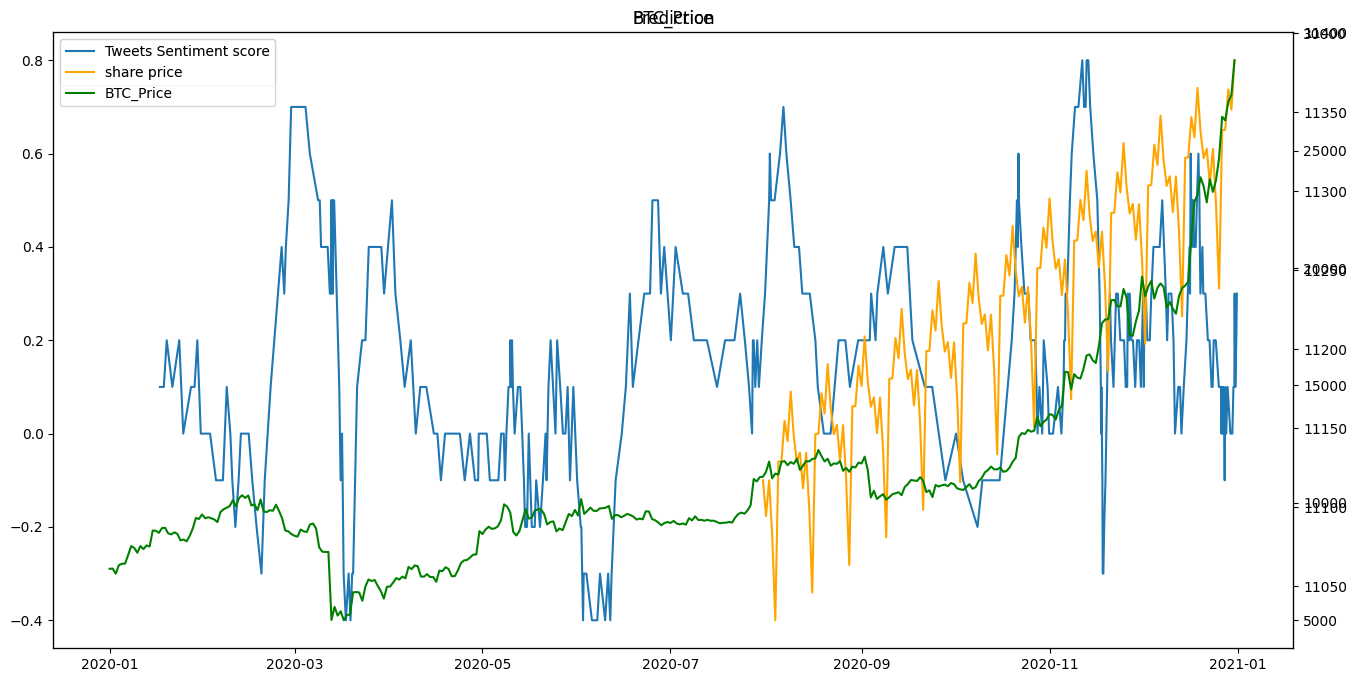

Spearman correlation: corr=nan pval=nan


In [140]:
sentiment= df.groupby('date')['impact_score'].mean().shift(-1).rolling(10).mean()
corr_test = df.groupby('date')['impact_score'].mean().shift(-1)
corr, pval = stat.spearmanr(corr_test.reindex(btc_stock.index.to_numpy()), btc_stock['Open'],nan_policy='omit')

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(sentiment.index.to_numpy(),sentiment.to_numpy(),label='Tweets Sentiment score')


ax2 = ax.twinx()
ax2.plot(predictions.index.to_numpy(),predictions['predicted_mean'].to_numpy(),color='orange',label='share price')
ax2.set_title("Prediction")


ax3 = ax.twinx()
ax3.plot(btc_stock.index.to_numpy(),btc_stock['Open'].to_numpy(),color='green',label='BTC_Price')
ax3.set_title("BTC_Price")


lines, labels = ax.get_legend_handles_labels()

lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2+lines3, labels + labels2+labels3, loc=0)

plt.show()

print("Spearman correlation: corr={} pval={}".format(corr,pval))

# BTC Sentiment And Arima

In [192]:
arima_predictions=pd.DataFrame(arima_predictions)
arima_predictions["date"]=arima_predictions.index
arima_predictions = arima_predictions[arima_predictions['date'].dt.year == 2020]


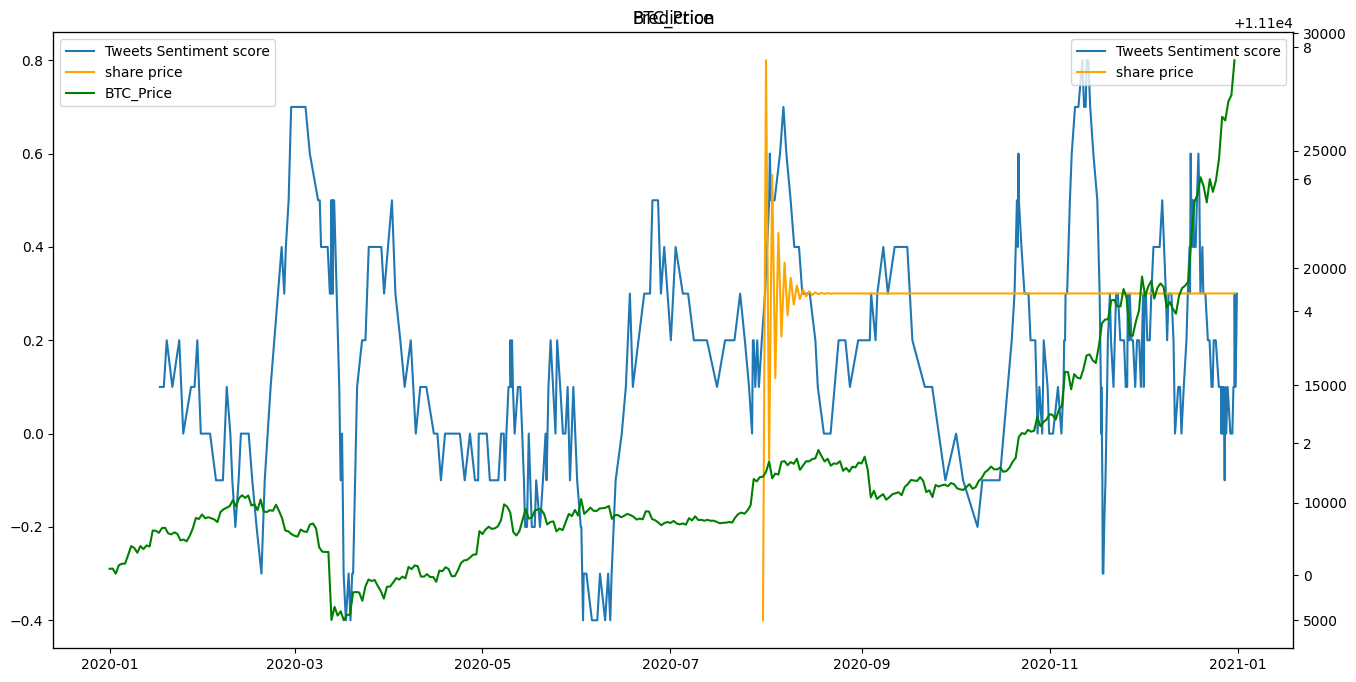

Spearman correlation: corr=nan pval=nan


In [193]:
sentiment= df.groupby('date')['impact_score'].mean().shift(-1).rolling(10).mean()
corr_test = df.groupby('date')['impact_score'].mean().shift(-1)
corr, pval = stat.spearmanr(corr_test.reindex(btc_stock.index.to_numpy()), btc_stock['Open'],nan_policy='omit')

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(sentiment.index.to_numpy(),sentiment.to_numpy(),label='Tweets Sentiment score')


ax2 = ax.twinx()
ax2.plot(arima_predictions.index.to_numpy(),arima_predictions['predicted_mean'].to_numpy(),color='orange',label='share price')
ax2.set_title("Prediction")


ax3 = ax.twinx()
ax3.plot(btc_stock.index.to_numpy(),btc_stock['Open'].to_numpy(),color='green',label='BTC_Price')
ax3.set_title("BTC_Price")


lines, labels = ax.get_legend_handles_labels()

lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2+lines3, labels + labels2+labels3, loc=0)

plt.show()

print("Spearman correlation: corr={} pval={}".format(corr,pval))

# BTC Sentiment And LSTM

In [183]:
x=[]
for i in lstm_predictions:
  x.append(i)


In [184]:
lstm_prediction=pd.DataFrame()
lstm_prediction["predicted_mean"]=x
lstm_prediction["date"]=sarima_predictions.index

lstm_prediction = lstm_prediction[lstm_prediction['date'].dt.year == 2020]
lstm_prediction.index=lstm_prediction["date"]


In [185]:
lstm_prediction

,predicted_mean,date
date,,
2020-07-31 00:00:00+00:00,[0.49765113],2020-07-31 00:00:00+00:00
2020-08-01 00:00:00+00:00,[0.5245031],2020-08-01 00:00:00+00:00
2020-08-02 00:00:00+00:00,[0.48103335],2020-08-02 00:00:00+00:00
2020-08-03 00:00:00+00:00,[0.49290234],2020-08-03 00:00:00+00:00
2020-08-04 00:00:00+00:00,[0.49041107],2020-08-04 00:00:00+00:00
...,...,...
2020-12-27 00:00:00+00:00,[1.4053243],2020-12-27 00:00:00+00:00
2020-12-28 00:00:00+00:00,[1.4534221],2020-12-28 00:00:00+00:00
2020-12-29 00:00:00+00:00,[1.4698164],2020-12-29 00:00:00+00:00


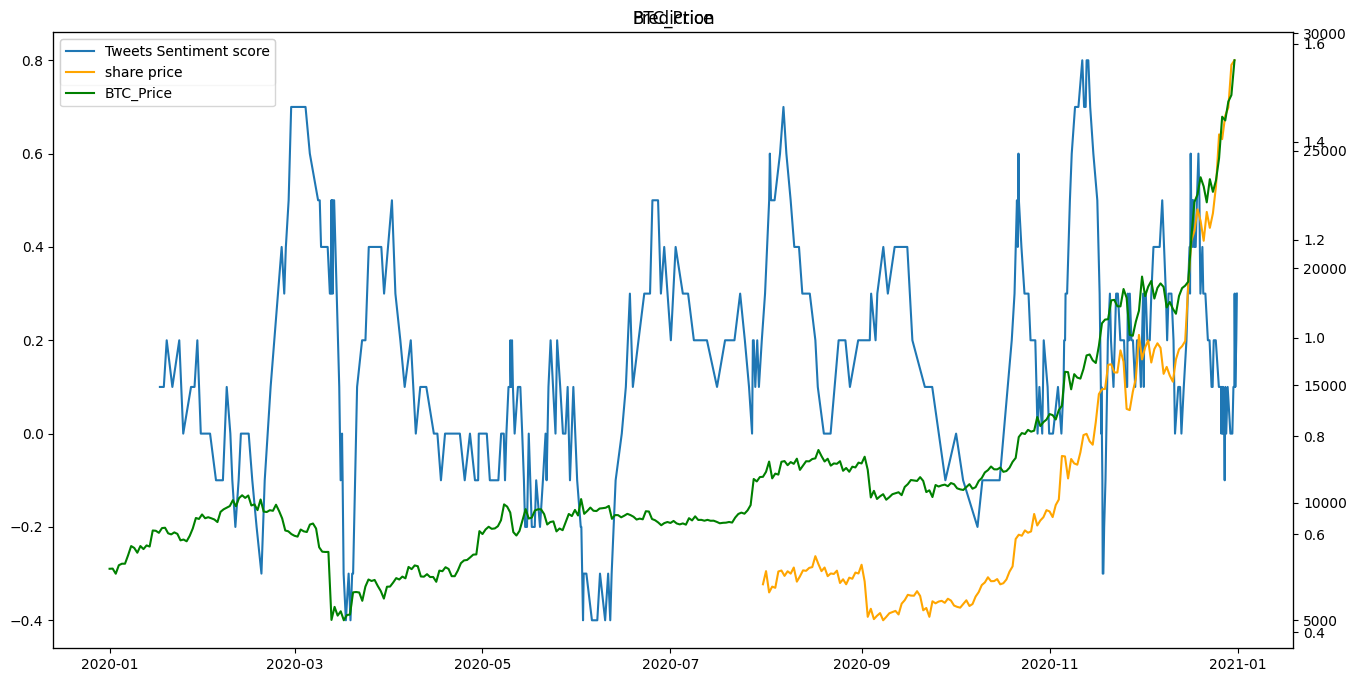

Spearman correlation: corr=nan pval=nan


In [187]:
sentiment= df.groupby('date')['impact_score'].mean().shift(-1).rolling(10).mean()
corr_test = df.groupby('date')['impact_score'].mean().shift(-1)
corr, pval = stat.spearmanr(corr_test.reindex(btc_stock.index.to_numpy()), btc_stock['Open'],nan_policy='omit')

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(sentiment.index.to_numpy(),sentiment.to_numpy(),label='Tweets Sentiment score')


ax2 = ax.twinx()
ax2.plot(lstm_prediction.index.to_numpy(),lstm_prediction['predicted_mean'].to_numpy(),color='orange',label='share price')
ax2.set_title("Prediction")


ax3 = ax.twinx()
ax3.plot(btc_stock.index.to_numpy(),btc_stock['Open'].to_numpy(),color='green',label='BTC_Price')
ax3.set_title("BTC_Price")


lines, labels = ax.get_legend_handles_labels()

lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2+lines3, labels + labels2+labels3, loc=0)

plt.show()

print("Spearman correlation: corr={} pval={}".format(corr,pval))